In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt 

In [2]:
Data = pd.read_csv('C:\\Users\\rapha\\Documents\\Data\\train.csv')

In [3]:
Data.head(20)

,Unnamed: 0,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday,Sales
0,272371,415,7,2015-03-01,0,0,0,0,0,0
1,558468,27,7,2013-12-29,0,0,0,0,0,0
2,76950,404,3,2014-03-19,657,1,1,0,0,5483
3,77556,683,2,2013-01-29,862,1,0,0,0,9325
4,456344,920,3,2014-03-19,591,1,1,0,0,5402
5,436466,758,4,2014-06-26,569,1,0,0,0,3897
6,646251,563,1,2015-02-16,321,1,1,0,0,3013
7,650464,930,6,2014-11-22,1367,1,0,0,0,7724
8,162710,756,4,2015-06-04,0,0,1,a,0,0
9,100327,49,2,2015-01-13,546,1,1,0,0,7062


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 10 columns):
Unnamed: 0             640840 non-null int64
Store_ID               640840 non-null int64
Day_of_week            640840 non-null int64
Date                   640840 non-null object
Nb_customers_on_day    640840 non-null int64
Open                   640840 non-null int64
Promotion              640840 non-null int64
State_holiday          640840 non-null object
School_holiday         640840 non-null int64
Sales                  640840 non-null int64
dtypes: int64(8), object(2)
memory usage: 48.9+ MB


In [5]:
Data['Date'] = pd.to_datetime(Data['Date'])
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 10 columns):
Unnamed: 0             640840 non-null int64
Store_ID               640840 non-null int64
Day_of_week            640840 non-null int64
Date                   640840 non-null datetime64[ns]
Nb_customers_on_day    640840 non-null int64
Open                   640840 non-null int64
Promotion              640840 non-null int64
State_holiday          640840 non-null object
School_holiday         640840 non-null int64
Sales                  640840 non-null int64
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 48.9+ MB


In [6]:
Data['State_holiday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [7]:
Data['State_holiday'].value_counts()

0    621156
a     12823
b      4251
c      2610
Name: State_holiday, dtype: int64

In [8]:
Data['year'] = pd.DatetimeIndex(Data['Date']).year
Data['month'] = pd.DatetimeIndex(Data['Date']).month
Data['day'] = pd.DatetimeIndex(Data['Date']).day

In [9]:
Data = pd.get_dummies(Data)
Data

,Unnamed: 0,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,School_holiday,Sales,year,month,day,State_holiday_0,State_holiday_a,State_holiday_b,State_holiday_c
0,272371,415,7,2015-03-01,0,0,0,0,0,2015,3,1,1,0,0,0
1,558468,27,7,2013-12-29,0,0,0,0,0,2013,12,29,1,0,0,0
2,76950,404,3,2014-03-19,657,1,1,0,5483,2014,3,19,1,0,0,0
3,77556,683,2,2013-01-29,862,1,0,0,9325,2013,1,29,1,0,0,0
4,456344,920,3,2014-03-19,591,1,1,0,5402,2014,3,19,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640835,413636,577,4,2014-03-20,612,1,1,0,4770,2014,3,20,1,0,0,0
640836,36334,980,1,2014-12-29,563,1,0,1,6991,2014,12,29,1,0,0,0
640837,568252,624,3,2015-04-22,601,1,0,0,5771,2015,4,22,1,0,0,0
640838,599013,989,4,2013-07-25,532,1,0,0,4492,2013,7,25,1,0,0,0


In [10]:
Data.drop('Date', axis=1, inplace=True)

In [11]:
Data.drop('Unnamed: 0', axis=1, inplace=True)

In [12]:
Data.head(10)

,Store_ID,Day_of_week,Nb_customers_on_day,Open,Promotion,School_holiday,Sales,year,month,day,State_holiday_0,State_holiday_a,State_holiday_b,State_holiday_c
0,415,7,0,0,0,0,0,2015,3,1,1,0,0,0
1,27,7,0,0,0,0,0,2013,12,29,1,0,0,0
2,404,3,657,1,1,0,5483,2014,3,19,1,0,0,0
3,683,2,862,1,0,0,9325,2013,1,29,1,0,0,0
4,920,3,591,1,1,0,5402,2014,3,19,1,0,0,0
5,758,4,569,1,0,0,3897,2014,6,26,1,0,0,0
6,563,1,321,1,1,0,3013,2015,2,16,1,0,0,0
7,930,6,1367,1,0,0,7724,2014,11,22,1,0,0,0
8,756,4,0,0,1,0,0,2015,6,4,0,1,0,0
9,49,2,546,1,1,0,7062,2015,1,13,1,0,0,0


In [13]:
Data[['0.999007', '0.999504', '1.000000']]= pd.get_dummies(Data['year'])
Data

,Store_ID,Day_of_week,Nb_customers_on_day,Open,Promotion,School_holiday,Sales,year,month,day,State_holiday_0,State_holiday_a,State_holiday_b,State_holiday_c,0.999007,0.999504,1.000000
0,415,7,0,0,0,0,0,2015,3,1,1,0,0,0,0,0,1
1,27,7,0,0,0,0,0,2013,12,29,1,0,0,0,1,0,0
2,404,3,657,1,1,0,5483,2014,3,19,1,0,0,0,0,1,0
3,683,2,862,1,0,0,9325,2013,1,29,1,0,0,0,1,0,0
4,920,3,591,1,1,0,5402,2014,3,19,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640835,577,4,612,1,1,0,4770,2014,3,20,1,0,0,0,0,1,0
640836,980,1,563,1,0,1,6991,2014,12,29,1,0,0,0,0,1,0
640837,624,3,601,1,0,0,5771,2015,4,22,1,0,0,0,0,0,1
640838,989,4,532,1,0,0,4492,2013,7,25,1,0,0,0,1,0,0


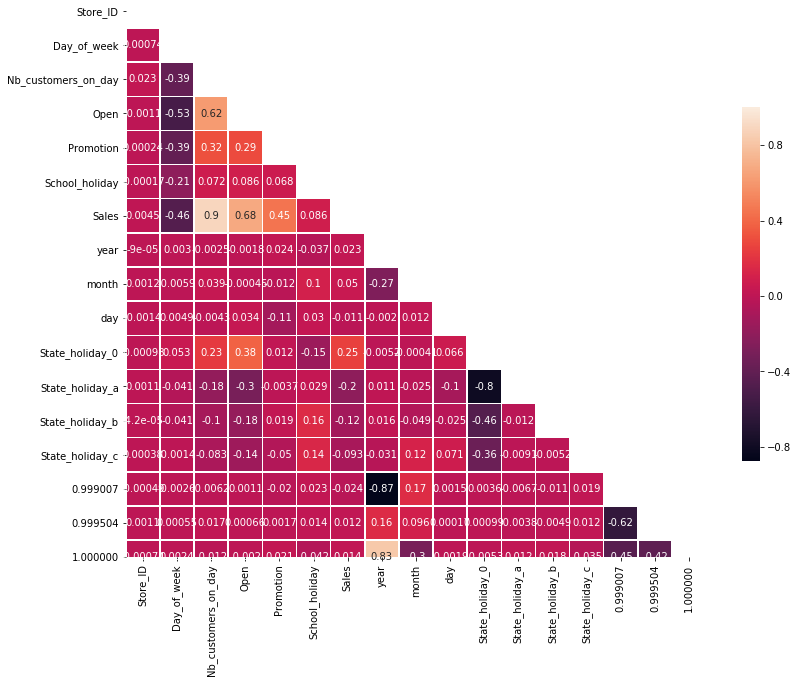

In [14]:
corr=Data.corr()

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 13))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)
plt.show()

In [ ]:
#Data_viz = sns.pairplot(Data['Sales'], Data['Nb_customers_on_day'])

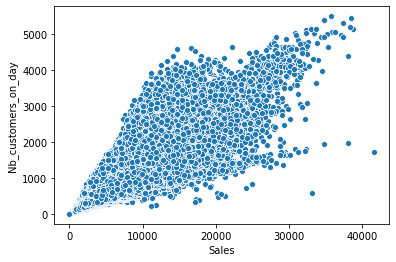

In [15]:
ax = sns.scatterplot(x=Data['Sales'], y=Data['Nb_customers_on_day'], data=Data)


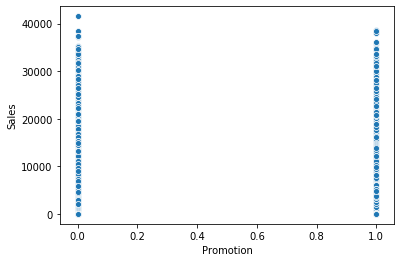

In [16]:
at = sns.scatterplot(x=Data['Promotion'], y=Data['Sales'], data=Data)

# Model

In [ ]:
#from sklearn.metrics import r2_score
#score = r2_score(actual_values, predictions)

In [17]:
target_column = ['Sales'] 
predictors = list(set(list(Data.columns))-set(target_column))
Data[predictors] = Data[predictors]/Data[predictors].max()
Data.describe()

,Store_ID,Day_of_week,Nb_customers_on_day,Open,Promotion,School_holiday,Sales,year,month,day,State_holiday_0,State_holiday_a,State_holiday_b,State_holiday_c,0.999007,0.999504,1.000000
count,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000
mean,0.500793,0.571488,0.115278,0.830087,0.381532,0.178684,5774.909767,0.999421,0.487132,0.506785,0.969284,0.020010,0.006633,0.004073,0.399808,0.367799,0.232393
std,0.288642,0.285225,0.084524,0.375557,0.485763,0.383088,3850.960836,0.000386,0.277148,0.283622,0.172547,0.140033,0.081176,0.063688,0.489859,0.482207,0.422359
min,0.000897,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.999007,0.083333,0.032258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.251121,0.285714,0.073717,1.000000,0.000000,0.000000,3727.000000,0.999007,0.250000,0.258065,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500448,0.571429,0.110848,1.000000,0.000000,0.000000,5746.000000,0.999504,0.500000,0.516129,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.750673,0.857143,0.152530,1.000000,1.000000,0.000000,7858.000000,0.999504,0.666667,0.741935,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,41551.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
X = Data[predictors].values
y = Data[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(448588, 16)
(192252, 16)


In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
pred_train_lr= lr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))

pred_test_lr= lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print(r2_score(y_test, pred_test_lr))

1469.2896084710294
0.8543059297909292
1454.9871242503798
0.8575260121864837


In [22]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

1469.2691864077312
0.8543099798472682
1454.950796787182
0.8575331265503845


In [23]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

1469.2692140602358
0.8543099743633256
1454.9509806525357
0.8575330905426737


C:\Users\rapha\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79757725868.39087, tolerance: 664692211.0380484
  positive)


In [24]:
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
pred_train_enet= model_enet.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print(r2_score(y_train, pred_train_enet))

pred_test_enet= model_enet.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print(r2_score(y_test, pred_test_enet))

1868.8936407920742
0.7642801073534669
1864.0067509751566
0.7661635323395515


In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr

rf = RandomForestRegressor(n_estimators=500, max_depth=40, oob_score=True, random_state=0)
rf.fit(X_train, y_train)



C:\Users\rapha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=40,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=True, random_state=0, verbose=0,
                      warm_start=False)

In [26]:
predicted_train = rf.predict(X_train)
predicted_test = rf.predict(X_test)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
#pearson = pearsonr(y_test, predicted_test)
print(f'Out-of-bag R-2 score estimate: {rf.oob_score_:>5.3}')
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
#print(f'Test data Pearson correlation: {pearson[0]:.3}')

Out-of-bag R-2 score estimate: 0.946
Test data R-2 score: 0.947
Test data Spearman correlation: 0.965


In [24]:
from sklearn.ensemble import StackingRegressor

ImportError: cannot import name 'StackingRegressor' from 'sklearn.ensemble' (C:\Users\rapha\Anaconda3\lib\site-packages\sklearn\ensemble\__init__.py)

In [ ]:

# test regression dataset
from sklearn.datasets import make_regression
# define dataset
X, y = Data(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

# test regression dataset
from sklearn.datasets import make_regression
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

In [ ]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['knn'] = KNeighborsRegressor()
    models['cart'] = DecisionTreeRegressor()
    models['svm'] = SVR()
    return models

# get a list of models to evaluate
def get_models():
    models = dict()
    models['knn'] = KNeighborsRegressor()
    models['cart'] = DecisionTreeRegressor()
    models['svm'] = SVR()
    return models

In [ ]:
# evaluate a given model using cross-validation
def evaluate_model(model):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# evaluate a given model using cross-validation
def evaluate_model(model):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [ ]:

# compare machine learning models for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from matplotlib import pyplot

# get the dataset
def get_dataset():
    X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
    return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    models['knn'] = KNeighborsRegressor()
    models['cart'] = DecisionTreeRegressor()
    models['svm'] = SVR()
    return models

# evaluate a given model using cross-validation
def evaluate_model(model):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# compare machine learning models for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
    X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
    return X, y
 
# get a list of models to evaluate
def get_models():
    models = dict()
    models['knn'] = KNeighborsRegressor()
    models['cart'] = DecisionTreeRegressor()
    models['svm'] = SVR()
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:

# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('knn', KNeighborsRegressor()))
    level0.append(('cart', DecisionTreeRegressor()))
    level0.append(('svm', SVR()))
    # define meta learner model
    level1 = LinearRegression()
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('knn', KNeighborsRegressor()))
    level0.append(('cart', DecisionTreeRegressor()))
    level0.append(('svm', SVR()))
    # define meta learner model
    level1 = LinearRegression()
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

In [ ]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['knn'] = KNeighborsRegressor()
    models['cart'] = DecisionTreeRegressor()
    models['svm'] = SVR()
    models['stacking'] = get_stacking()
    return models

In [ ]:

# compare ensemble to each standalone models for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
    X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
    return X, y
 
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('knn', KNeighborsRegressor()))
    level0.append(('cart', DecisionTreeRegressor()))
    level0.append(('svm', SVR()))
    # define meta learner model
    level1 = LinearRegression()
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model
 
# get a list of models to evaluate
def get_models():
    models = dict()
    models['knn'] = KNeighborsRegressor()
    models['cart'] = DecisionTreeRegressor()
    models['svm'] = SVR()
    models['stacking'] = get_stacking()
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:

# make a prediction with a stacking ensemble
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
# define the base models
level0 = list()
level0.append(('knn', KNeighborsRegressor()))
level0.append(('cart', DecisionTreeRegressor()))
level0.append(('svm', SVR()))
# define meta learner model
level1 = LinearRegression()
# define the stacking ensemble
model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model.fit(X, y)
# make a prediction for one example
data = [[0.59332206,-0.56637507,1.34808718,-0.57054047,-0.72480487,1.05648449,0.77744852,0.07361796,0.88398267,2.02843157,1.01902732,0.11227799,0.94218853,0.26741783,0.91458143,-0.72759572,1.08842814,-0.61450942,-0.69387293,1.69169009]]
yhat = model.predict(data)
print('Predicted Value: %.3f' % (yhat))